<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\pedro\AppData\Local\Temp\ipykernel_15896\83778889.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde = True)


<Axes: xlabel='ConvertedComp', ylabel='Density'>

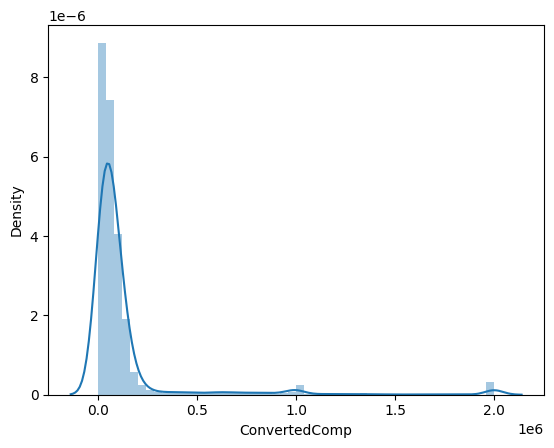

In [3]:
# your code goes here
import seaborn as sns 
sns.distplot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


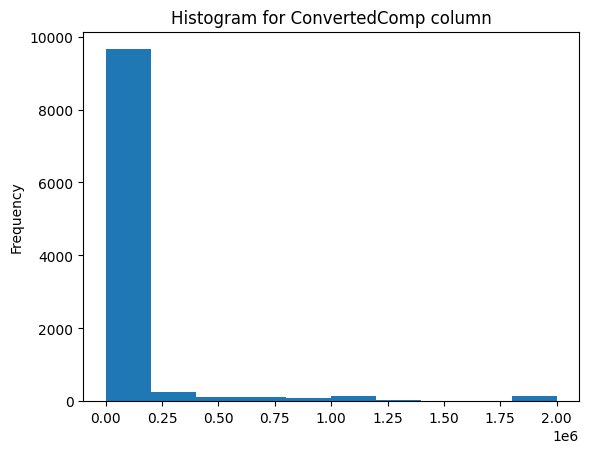

In [5]:
# your code goes here
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
df['ConvertedComp'].plot(kind='hist')
plt.title('Histogram for ConvertedComp column')
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
(df['Gender']=='Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
df[df["Gender"]=="Woman"]["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


In [36]:
# your code goes here
df['Age'].describe()

count    10250.000000
mean        30.647298
std          7.352928
min         16.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Histogram for Age')

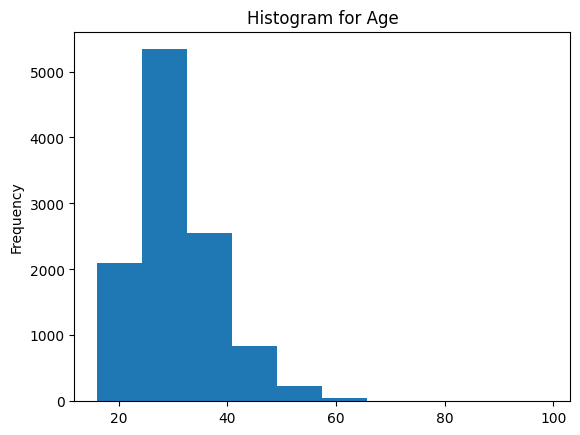

In [11]:
# your code goes here
df['Age'].plot(kind='hist')
plt.title('Histogram for Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

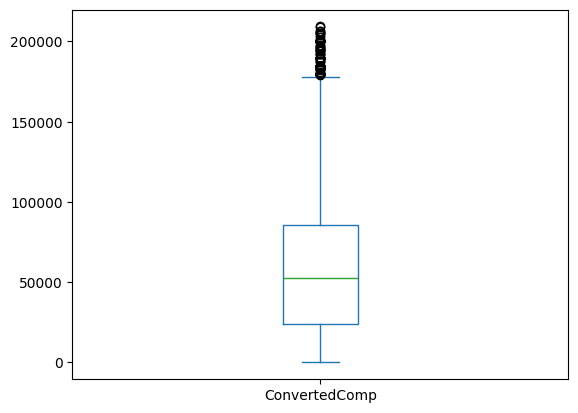

In [38]:
# your code goes here
df['ConvertedComp'].plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the upper and lower bounds.


In [27]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Identify how many outliers are there in the `ConvertedComp` column.


In [28]:
# your code goes here
((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [40]:
# your code goes here
import numpy as np
df_new = (df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))
df[df_new] = np.nan
df['ConvertedComp'].mean()
print(df['ConvertedComp'].median())

52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [34]:
# your code goes here
df.select_dtypes(include=['float64', 'int64']).corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
